In [62]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,  Flatten, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split

## *1. 데이터 로드

In [5]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [6]:
ids = movie_reviews.fileids()
reviews = [movie_reviews.raw(id) for id in ids]
categoris = [movie_reviews.categories(id)[0] for id in ids]

In [34]:
# 토큰화 및 정수 인코딩
max_word = 10000
tokenizer = Tokenizer(num_words=max_word, oov_token='UNK')
tokenizer.fit_on_texts(reviews)

In [25]:
# 텍스트 -> 시퀀스 변환
x = tokenizer.texts_to_sequences(reviews)
len(x[0]), len(x[10]) #길이 다름

(710, 726)

In [49]:
# 시퀀스 패딩 (길이 맞춰주기)
maxlen=500
x = pad_sequences(x,maxlen=maxlen,truncating='pre')

In [50]:
# 레이블 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categoris])

In [32]:
# 학습/테스트 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y, random_state=42,test_size=0.2)

## *2. 세가지 모델 구축, 학습

In [29]:
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)

# 모델 성능
results = {}

In [57]:
from numpy._core.multiarray import result_type
# model1: baseline(Flatten+Dense)

model1 = Sequential([
    Embedding(max_word,32,input_length=maxlen),
    Flatten(),
    Dropout(0.5),
    Dense(1,activation ='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(x_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
score1 = model1.evaluate(x_test,y_test)
results['baseline'] = score1[1]
print(f'model1 정확도: {score1[1]:.4f}')

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.5203 - loss: 0.6923 - val_acc: 0.4969 - val_loss: 0.6933
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9607 - loss: 0.6143 - val_acc: 0.5344 - val_loss: 0.6895
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9804 - loss: 0.5379 - val_acc: 0.5938 - val_loss: 0.6838
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9929 - loss: 0.4270 - val_acc: 0.6000 - val_loss: 0.6759
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9959 - loss: 0.3081 - val_acc: 0.5969 - val_loss: 0.6649
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9998 - loss: 0.2000 - val_acc: 0.6250 - val_loss: 0.6548
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 1.0000 - loss: 0.1341 - val_acc: 0.6344 - val_loss: 0.6449
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 1.0000 - loss: 0.0896 - val_acc: 0.6375 - val_loss: 0.6383
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9998

In [58]:
# model2: SimpleRNN

model2 = Sequential([
    Embedding(max_word,32,input_length=maxlen),
    SimpleRNN(32),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
score2 = model2.evaluate(x_test,y_test)
results['SimpleRNN'] = score2[1]
print(f'model2 정확도: {score2[1]:.4f}')

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - acc: 0.4997 - loss: 0.6956 - val_acc: 0.4875 - val_loss: 0.7025
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - acc: 0.5929 - loss: 0.6655 - val_acc: 0.4625 - val_loss: 0.6982
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - acc: 0.7377 - loss: 0.6163 - val_acc: 0.4969 - val_loss: 0.7169
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - acc: 0.9042 - loss: 0.4436 - val_acc: 0.5094 - val_loss: 0.8397
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - acc: 0.9648 - loss: 0.1897 - val_acc: 0.5063 - val_loss: 1.1011
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - acc: 0.9804 - loss: 0.1072 - val_acc: 0.5125 - val_loss: 0.9323
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - acc: 0.9732 - loss: 0.1235 - val_acc: 0.5063 - val_loss: 1.0545
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - acc: 0.9921 - loss: 0.0580 - val_acc: 0.5000 - val_loss: 1.1803
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - ac

- 1. 모델 정의
| 층(Layer)                                         | 설명                                                                                                      |
| ------------------------------------------------ | ------------------------------------------------------------------------------------------------------- |
| **Embedding(max_word, 64, input_length=maxlen)** | 단어 인덱스를 64차원 **임베딩 벡터**로 변 <br>즉, 텍스트를 벡터 형태로 바꿔 LSTM이 이해할 수 있도록 하는 단계                          |
| **Bidirectional(LSTM(64))**                      | LSTM을 **정방향(forward)** + **역방향(backward)** 모두 학습하도록 하여 문맥 이해력을 높이는 구조 <br>하나의 시퀀스를 앞뒤로 모두 본다는 뜻 |
| **Dense(64, activation='relu')**                 | 은닉층(hidden layer). 비선형 변환을 통해 LSTM의 출력 특징을 학습                                                     |
| **Dense(1, activation='sigmoid')**               | 출력층. 이진 분류를 위해 `sigmoid`를 사용하여 0~1 사이 확률값을 출력                                                       |

- 2. 컴파일
  - `optimizer='adam'` → 가중치 최적화 알고리즘으로 `Adam` 사용
  - `loss='binary_crossentropy'` → `0/1` 분류에 사용되는 손실 함수
  - `metrics=['acc']` → 학습 과정에서 정확도(accuracy)를 확인

```
score3[0] → 손실값(loss)
score3[1] → 정확도(accuracy)
```

In [63]:
# model3: 양방향 LSTM

## 1. 모델 정의
model3 = Sequential([
    Embedding(max_word,64,input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(64,activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
## 2. 컴파일
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
## 3. 학습
history3 = model3.fit(x_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
## 4. 평가
score3 = model3.evaluate(x_test,y_test)
## 5. 결과
results['Bidrectional LSTM'] = score3[1] #딕셔너리에 모델명과 정확도 저장
print(f'model3 정확도: {score3[1]:.4f}')

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
Exception ignored in: <function _xla_gc_callback at 0x7d165d8fcae0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/lib/__init__.py", line 127, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 523ms/step - acc: 0.5223 - loss: 1.3931 - val_acc: 0.5500 - val_loss: 1.0905
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 493ms/step - acc: 0.5897 - loss: 1.0202 - val_acc: 0.5437 - val_loss: 0.8688
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 484ms/step - acc: 0.6543 - loss: 0.8109 - val_acc: 0.4688 - val_loss: 1.0351
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 502ms/step - acc: 0.6836 - loss: 0.6888 - val_acc: 0.6687 - val_loss: 0.7071
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step - acc: 0.8976 - loss: 0.3389 - val_acc: 0.7375 - val_loss: 0.7029
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 504ms/step - acc: 0.9569 - loss: 0.1823 - val_acc: 0.7156 - val_loss: 0.7559
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step - acc: 0.9894 - loss: 0.1110 - val_acc: 0.6719 - val_loss: 1.0141
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 516ms/step - acc: 0.9740 - loss: 0.1180 - val_acc: 0.7063 - val_loss: 0.8983
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 468ms/step - acc:

## *3. 성능 비교 및 시각화

Bid_LSTM : 0.7450
Bidrectional LSTM : 0.7275
baseline : 0.6125
SimpleRNN : 0.5600


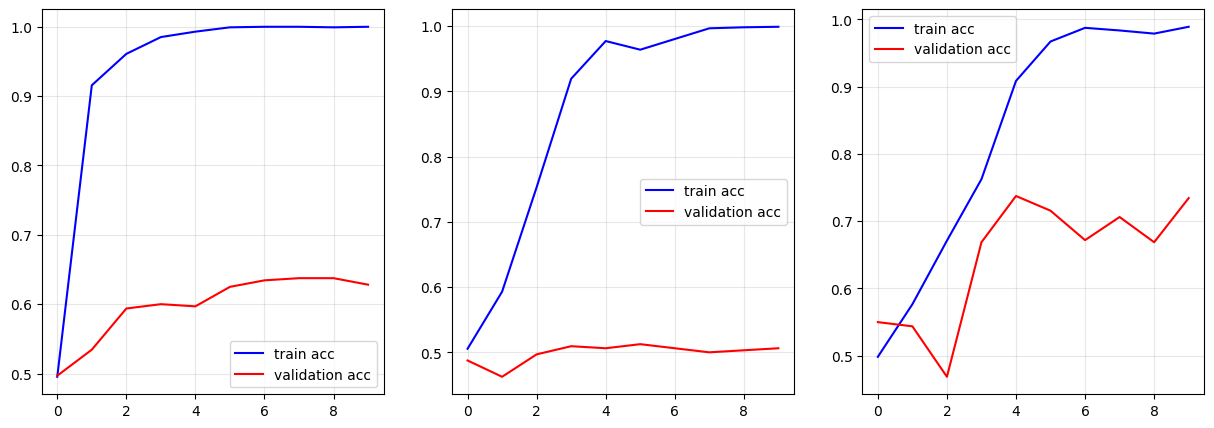

In [64]:
for modelname, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
  print(f'{modelname} : {acc:.4f}')

fig, ax = plt.subplots(1,3,figsize=(15,5))
# baseline
ax[0].plot(history1.history['acc'], 'b-', label='train acc')
ax[0].plot(history1.history['val_acc'], 'r-', label='validation acc')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
# SimpleRNN
ax[1].plot(history2.history['acc'], 'b-', label='train acc')
ax[1].plot(history2.history['val_acc'], 'r-', label='validation acc')
ax[1].legend()
ax[1].grid(True,alpha=0.3)
# Bidirection LSTM
ax[2].plot(history3.history['acc'], 'b-', label='train acc')
ax[2].plot(history3.history['val_acc'], 'r-', label='validation acc')
ax[2].legend()
ax[2].grid(True,alpha=0.3)
